# Introduction to regression models

Import relevant libraries

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [3]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

In [4]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Get 100 samples with random state (seed) = 1

In [6]:
import random

wine_sample=wine_df.sample(n=100, random_state=1)

## Create your own linear model

Plot pH in function of fixed acidity

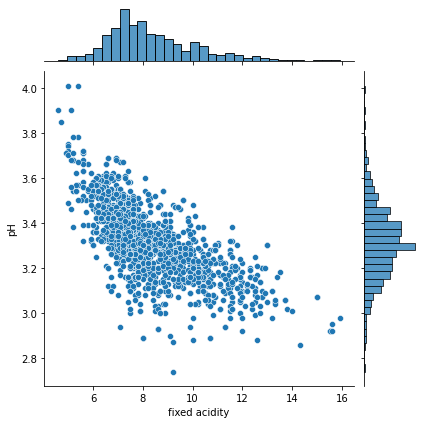

In [7]:
sns.jointplot(x="fixed acidity", y="pH", data=wine_df)

What can you say about pH and fixed acidity? are they correlated ? 

In [8]:
def calcule_y_pred(x, b0, b1):

     y_pred = b0 + b1 * x
        
     return y_pred
x=wine_sample["fixed acidity"]
y=wine_sample["pH"]
b1=random.random()
b0=np.arange(0,100)
y1= calcule_y_pred(x, b0, b1)
y1

75        2.263088
1283      3.237371
408       4.674559
1281      4.825901
1118      5.825901
           ...    
529      97.545974
912      98.571691
1227     99.314522
1374     99.748750
1198    100.980202
Name: fixed acidity, Length: 100, dtype: float64

In [9]:
def calcul_error(y_pred, y):
    e=np.square(np.subtract(y_pred,y))
    e=e.sum()
    return e

In [14]:
for b0 in np.arange(-20, 1, 1):
     def calcule_y_hat(x, b0, b1):
            y_hat = b0 + b1 * x
            return y_hat
   

Try to find a linear model by hand. plot it with the sample set

Hint: define an intercept and slope. Then, plot it graphically

y = a * x + b, where a is slope and b is intercept

In [15]:
for b0 in np.arange(-20, 1, 1):
    y_hat = calcule_y_hat(x, b0, b1)
    

what is the best linear model you can find ? try to define different intercepts and slopes by hand

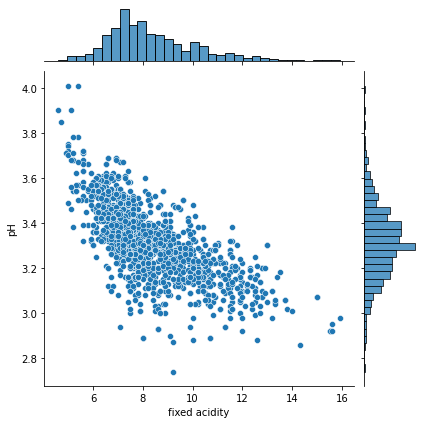

In [110]:
sns.jointplot(x="fixed acidity", y="pH", data=wine_df)

Compare to seaborn regplot

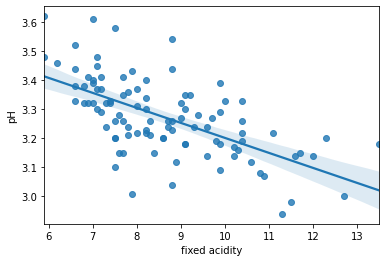

In [17]:
sns.regplot(y='pH', x='fixed acidity', data=wine_sample);

In [112]:
# plot your linear model with regplot and compare

How far is your linear model from seaborn model?

How do you evaluate the performance of your linear models at each iteration ?

Try to create a method where each time you define a slope or intercept, you reduce the error of the model. Then, you iterate to find the best model

Hint: choose a fixed intercept, find the slope that reduce the error of the model. Then keep that slope, find the new intercept that reduce the error of the model ...

How many iterations did you tried ? what are the best intercept and slope you found? Are you closer to the seaborn linear model ?  

According to you ... is this the OLS method ? can you describe with your own words, how it works? how different is from your method ?

Compare with the Linear regression used in scikit learn

In [18]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = wine_sample[['fixed acidity']]
y= wine_sample['pH']

# Train the model on the data
model.fit(X, y)

# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)

[-0.051601]
3.7176554637668797


Are you close to these values ?

How do you interpret these values? What do they say about the pH and fixed acidity?

## inference analysis

Get a new sample of 100 with different random state (seed) = 60

In [19]:
newsample_df=wine_df.sample(n=100, random_state=60)
newsample_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6
844,9.9,0.250,0.46,1.7,0.062,26.0,42.0,0.99590,3.18,0.83,10.6,6
1573,6.0,0.580,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6
150,7.3,0.330,0.47,2.1,0.077,5.0,11.0,0.99580,3.33,0.53,10.3,6
258,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1350,9.0,0.600,0.29,2.0,0.069,32.0,73.0,0.99654,3.34,0.57,10.0,5
677,8.6,0.800,0.11,2.3,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5
712,8.7,0.690,0.00,3.2,0.084,13.0,33.0,0.99920,3.36,0.45,9.4,5
1078,8.6,0.370,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5


Does your best linear model fit with this new sample set ?  Why ?


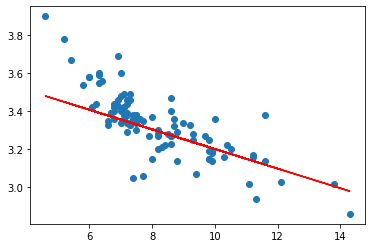

In [20]:
x = newsample_df["fixed acidity"]
y = newsample_df["pH"]
plt.scatter(x, y)

y = -0.051601 * x + 3.7176554637668797
plt.plot(x, y, color='red')

How can you solve the problem ?

# un model de regression lineaire

# Predict wine quality - regression problem

## Simple Linear regression

Let's try to create a new linear regression. This time, try to find the best model to predict quality in function of pH

Follow the same steps as before: 
- choose a random sample with fixed seed
- use seaborn to see the linear model in this sample
- calculate the best linear regression
- check if the model fits with a new sample

In [21]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = newsample_df[['pH']]
y= newsample_df['quality']

# Train the model on the data
model.fit(X, y)

# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)

[-0.50935696]
7.288552642404198


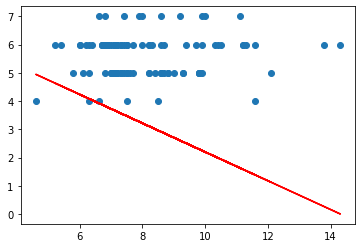

In [22]:
plt.scatter(x, y)
y =-0.50935696* x + 7.288552642404198
plt.plot(x, y, color='red')

How good is this model performing? What is the error? is it low or high ?

In [ ]:
#des mauvaises resultas, les nuages des points est trop loin de la droite du coup on n 'a pas une bonne fonction cout'

### Using Holdout method 

Use train split method to divide the dataset in 70% train set and 30% test set

In [23]:
from sklearn.model_selection import train_test_split

# Choose your feature and your target
X = newsample_df[['pH']]
y = newsample_df['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

-0.010913475004120876

Is this score good or bad? What does it means? 

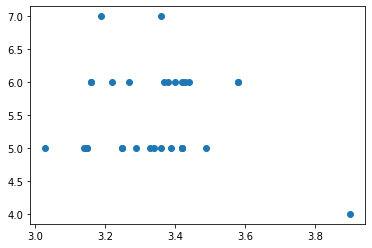

In [24]:
plt.scatter(X_test, y_test)


Try another feature. Replace pH with fixed acidity, volatile acidity, ...

Which feature increases this value? 

In [25]:
from sklearn.model_selection import train_test_split
# Choose your feature and your target
X = newsample_df[['fixed acidity']]
y = newsample_df['volatile acidity']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

-0.29503111075329147

Do you think you can do better ?

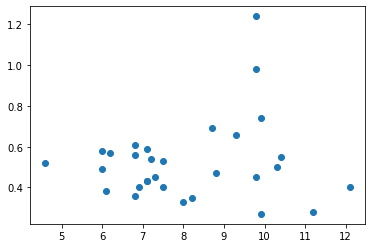

In [26]:
plt.scatter(X_test, y_test)

## Multi linear regression

Let's add multiple features in the regression model. Then create a new model and compare your results with Simple regression. Is it better or worst? 

In [27]:
from sklearn.linear_model import LinearRegression
y= newsample_df['quality']
X = newsample_df[['pH','alcohol', 'fixed acidity', 'density', 'chlorides','quality']]
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

 

1.0

In [29]:
from sklearn.linear_model import LinearRegression
y= newsample_df['quality']
X = newsample_df[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.13940340562378917

Try with all the features (all without column quality of course). 

Create a new model and compare with the last one. Is it better? Why? 



If you add the column quality in the variable X, what would happen ? 

In [31]:
X = newsample_df[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]
#Chi2 select the features with best dependency with target
from sklearn.feature_selection import SelectKBest, chi2
chi2(X, y)

(array([4.72825808e-02, 3.43012992e+00, 5.23190209e-01, 3.89379467e-05,
        4.03841748e-02]),
 array([0.99730401, 0.32993774, 0.91376787, 0.99999994, 0.99786754]))

In [32]:
#select K best features (I chose K=3), then fit_transform it/ get_support returns a numpy boolean array (True==best features) / 
#then Boolean indexing to show the columns
selector = SelectKBest(chi2, k=3)
selector.fit_transform(X, y)
selector.get_support()
np.array(X.columns)[selector.get_support()]

#'Free sulfur' & 'total sulfur' are very correlated so we can choose only one.

array(['pH', 'alcohol', 'fixed acidity'], dtype=object)

Do you think that there are features that are not helping to increase the performance? Which ones do you suspect? 

Do you know a method to identify them? 

How can you find the best combination of features to increase the performance of the model?

# Predict wine quality - classification problem

## convert quality column in 2 classes

Create a classification version (good or bad) of target variable (quality). To do so, let's consider that the wine with quality equal of higher than 7 is good quality and the rest bad quality. 

You can call the new column goodquality

In [127]:
# Create Classification version of target variable


# Separate feature variables and target variable



How many samples are considered as good and how many are bad? Is this balanced

In [95]:
# Create Classification version of target variable
wine_df['goodquality'] = [1 if x >= 7 else 0 for x in wine_df['quality']]
# Separate feature variables and target variable
X = wine_df.drop(['quality','goodquality'], axis = 1)
y = wine_df['goodquality']
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [96]:
#See proportion of good vs bad wines
wine_df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

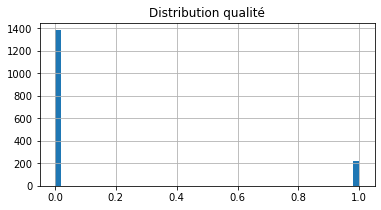

In [97]:
import matplotlib as plt
import seaborn as sns
ax = wine_df['goodquality'].hist(bins=50, figsize=(6,3))
ax.set_title('Distribution qualité');

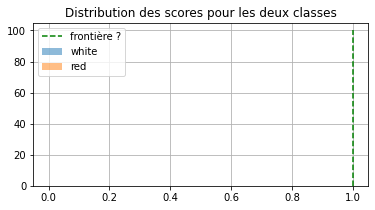

In [75]:
ax =  wine_df[ wine_df['goodquality'] == 'white']['quality'].hist(bins=25, figsize=(6,3), label='white', alpha=0.5)
wine_df[ wine_df['goodquality'] == 'red']['quality'].hist(bins=25, ax=ax, label='red', alpha=0.5)
ax.set_title("Distribution des scores pour les deux classes")
ax.plot([1, 1], [0, 100], 'g--', label="frontière ?")
ax.legend();

In [76]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [98]:
# Splitting the data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
# Choose your model
model1 = LogisticRegression(max_iter=1000)

# Fit the model with the train set
model1.fit(X_train, y_train)

# Evaluate the model with the test set
model1.score(X_test, y_test)

0.895

In [164]:
X = wine_df.drop(['quality','goodquality'], axis = 1)
y = wine_df['goodquality']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
# define the model
model1 = LinearRegression()
# fit the model
model1.fit(X, y)
# get importance
importance = model1.coef_
#print the score for each feature
for i,v in enumerate(importance):
    print('Feature:', i, 'Score:', v)

Feature: 0 Score: 0.03400330581866797
Feature: 1 Score: -0.17828159058734483
Feature: 2 Score: 0.0868324169963439
Feature: 3 Score: 0.02519706855766321
Feature: 4 Score: -0.6556213529459345
Feature: 5 Score: -0.000552569665335061
Feature: 6 Score: -0.0006657635574583205
Feature: 7 Score: -36.67732595223871
Feature: 8 Score: 0.01724979266231774
Feature: 9 Score: 0.3515431187995192
Feature: 10 Score: 0.07617758234775142


## Simple Logistic regression

Try to create a first logistic regression model from a sample

In [165]:
from sklearn.metrics import classification_report
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       425
           1       0.59      0.29      0.39        55

    accuracy                           0.90       480
   macro avg       0.75      0.63      0.67       480
weighted avg       0.88      0.90      0.88       480



In classification, how do you evaluate the performance of the model ?

Try different pair of data sets: (pH, goodquality), (fixed acidity, goodquality), (alcohol, goodquality) 

Which pair performs better?

In [166]:
from sklearn.pipeline import make_pipeline
# matrice confusion 
y_predicted = model1.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[414,  11],
       [ 39,  16]], dtype=int64)

Text(69.0, 0.5, 'Truth')

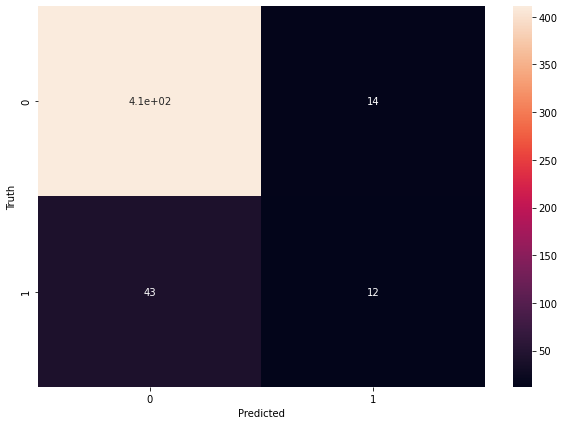

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

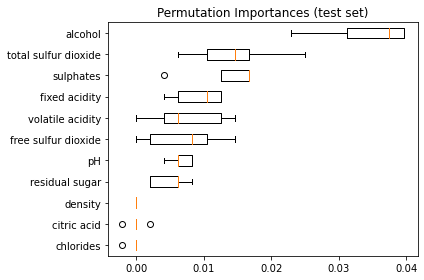

In [167]:
#features permutation 

from sklearn.inspection import permutation_importance
result = permutation_importance(model1, X_test, y_test, scoring='accuracy', random_state=42)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [168]:
result

{'importances_mean': array([ 0.00916667,  0.0075    ,  0.        ,  0.005     , -0.00041667,
         0.00708333,  0.01458333,  0.        ,  0.00666667,  0.01333333,
         0.03416667]),
 'importances_std': array([0.00338502, 0.00536837, 0.00131762, 0.0025    , 0.00083333,
        0.00536837, 0.00631906, 0.        , 0.00155902, 0.00485913,
        0.00640095]),
 'importances': array([[ 0.01041667,  0.0125    ,  0.00416667,  0.00625   ,  0.0125    ],
        [ 0.01458333,  0.00416667,  0.0125    ,  0.        ,  0.00625   ],
        [ 0.00208333,  0.        , -0.00208333,  0.        ,  0.        ],
        [ 0.00208333,  0.00208333,  0.00625   ,  0.00625   ,  0.00833333],
        [-0.00208333,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.01458333,  0.00208333,  0.00833333,  0.        ,  0.01041667],
        [ 0.01666667,  0.00625   ,  0.025     ,  0.01458333,  0.01041667],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00625  

<AxesSubplot:xlabel='alcohol', ylabel='goodquality'>

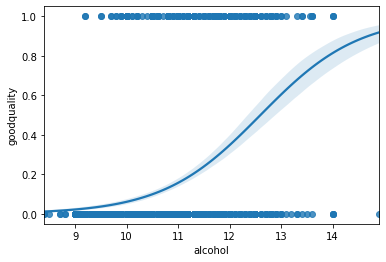

In [150]:
#f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="alcohol", y="goodquality", data=wine_df, logistic=True)


In [123]:
X=wine_df[["fixed acidity","alcohol","volatile acidity","citric acid"]]
y = wine_df['goodquality']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
# define the model
model1 = LinearRegression()
# fit the model
model1.fit(X, y)
# get importance
importance = model1.coef_
#print the score for each feature
for i,v in enumerate(importance):
    print('Feature:', i, 'Score:', v)

Feature: 0 Score: 0.01607793013473523
Feature: 1 Score: 0.12130166822477802
Feature: 2 Score: -0.29758613787677585
Feature: 3 Score: 0.05702577857910352


In [132]:
# Separate feature variables and target variable
X = wine_df[["volatile acidity","alcohol"]]
y = wine_df['goodquality']
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
# define the model
model1 = LinearRegression()
# fit the model
model1.fit(X, y)
# get importance
importance = model1.coef_
#print the score for each feature
for i,v in enumerate(importance):
    print('Feature:', i, 'Score:', v)

Feature: 0 Score: -0.3756707755576149
Feature: 1 Score: 0.1181733322368971


<AxesSubplot:xlabel='volatile acidity', ylabel='goodquality'>

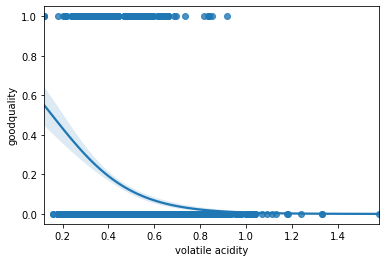

In [154]:
sns.regplot(x="volatile acidity", y="goodquality", data=wine_df, logistic=True)

<AxesSubplot:xlabel='citric acid', ylabel='goodquality'>

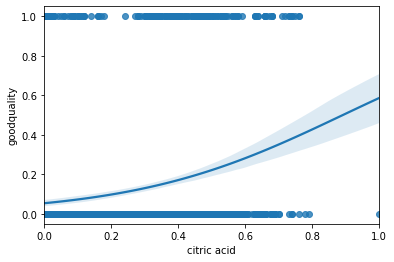

In [152]:
sns.regplot(x="citric acid", y="goodquality", data=wine_df, logistic=True)

## Multi logistic regression

Add new features to the model, try to find the best model reducing the error. 

Use everything you learned so far and good luck :)

In [ ]:
#la meilleur combinaison c'est alchol et good quality
